A dataset is given containing details about chemical compounds including their chemical features, isomeric conformation,
names and the classes in which they are classified. Thecompounds are classified as either ‘Musk’ or ‘Non-Musk’ compounds.
The dataset contains 6598 conformations of the molecules.Lets start by importing libraries and import Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_raw=pd.read_csv('musk_csv.csv')
df_raw.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [3]:
df_raw.shape

(6598, 170)

Since,Dataset has been loaded,we can observe the shape of data.
Dataset contain 170 different features from which only 20 features are visible as default,Creating a funtion will show 
all the remaining features

In [4]:
def display_all(df):
    with pd.option_context("display.max_columns", 1000):
        display(df)

In [5]:
display_all(df_raw.head())

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,-27,68,-44,98,-33,-314,-282,-335,-144,-13,-197,-2,-144,-13,-11,-131,108,-43,42,-151,-4,8,-102,51,-15,108,-135,59,-166,20,-20,23,-48,-68,-299,-256,-97,-183,-24,-271,-229,-177,-6,0,-129,112,15,36,-66,-54,-75,132,-188,119,-120,-312,23,-55,-53,-26,-71,41,-55,148,-247,-306,-308,-230,-166,-35,-205,-280,-239,-53,-10,-23,25,-5,163,61,59,-39,92,72,113,-107,80,25,-27,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,2,-144,38,-153,113,-166,-318,-241,-329,-97,-69,-108,-179,-71,-27,-12,-133,107,-96,92,-140,48,26,-62,2,13,58,-12,59,-166,-85,-131,-57,-156,-121,-285,-189,-255,-181,2,-284,-103,-186,-18,15,-31,127,-5,24,-82,-168,10,79,-200,82,14,-101,28,-52,-43,31,-156,79,-158,137,-281,-305,-294,-262,-165,-117,-244,-246,-231,3,-2,-3,15,49,99,37,84,22,66,131,109,-77,-10,-17,17,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,3,-129,37,-172,93,-42,-317,-242,-331,-98,-71,-106,-128,-71,-26,-12,-131,147,-93,93,-139,40,51,-28,-179,34,30,-21,56,-166,-85,-67,-57,-157,-133,-263,-190,-231,-182,1,-286,-103,-184,-19,14,-31,55,19,24,-88,-165,14,68,-202,47,-10,-85,19,40,-10,32,-156,79,-193,122,-271,-305,-296,-265,-168,-119,-244,-247,-230,3,-2,-3,-23,12,128,38,85,24,61,122,74,-36,-129,19,41,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,3,-144,38,-153,113,-163,-319,-242,-329,-97,-69,-108,-180,-71,-26,-12,-133,107,-95,93,-140,47,27,-63,-1,12,57,-12,59,-166,-84,-131,-56,-156,-122,-286,-191,-255,-181,1,-284,-104,-185,-19,14,-31,128,-5,24,-82,-168,9,78,-200,82,13,-101,28,-50,-44,31,-156,80,-158,137,-282,-306,-295,-263,-166,-118,-244,-247,-231,3,-2,-3,14,50,99,37,84,23,66,131,109,-78,-12,-18,17,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,3,-144,38,-153,113,-163,-319,-242,-329,-97,-69,-108,-180,-71,-26,-12,-133,107,-95,93,-140,47,27,-63,-1,12,57,-12,59,-166,-84,-131,-56,-156,-122,-286,-191,-255,-181,1,-284,-104,-185,-19,14,-31,128,-5,24,-82,-168,9,78,-200,82,13,-101,28,-50,-44,31,-156,80,-158,137,-282,-306,-295,-263,-166,-118,-244,-247,-231,3,-2,-3,1

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


Below code showing different values of the features like mean , standard deviation , values at different quantiles
In my opinion it is an appropriate method of studying your data apart from running code for individual feature

In [7]:
display_all(df_raw.describe())

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,-44.495756,-119.456502,-84.929221,-61.911185,-127.935283,-123.005153,-265.690967,-53.415732,-67.741285,-52.352531,-44.902698,-75.645953,-55.783419,-61.619127,72.506062,32.285238,-69.659139,-15.361018,-102.665959,8.520764,12.553956,-82.314186,25.436193,-34.503183,-78.915732,-73.199000,115.882995,-115.562746,-7.853289,-75.578509,12.700667,-94.105335,24.210821,-45.615186,-121.602758,-125.547439,-170.321461,-95.759018,-87.315399,-24.237951,-54.001819,-91.248863,-67.800697,-55.654744,7.128221,80.092452,-62.756896,5.114580,-112.445893,26.498030,-36.375417,-23.988027,-54.988481,1.634435,-17.274022,-61.321916,79.316763,-155.735677,-16.943619,-13.007730,-6.271749,-84.647772,-82.482722,-99.559867,-104.820855,-72.398151,-175.827372,-83.528190,-92.815247,-73.518036,-3.541982,-70.569567,-34.470294,-74.743407,67.787208,-44.386935,-41.463474,-62.579418,-100.544559,2.058199,30.591846,-111.898151,85.028342,-39.855865,-118.955744,-6.052440,82.377690,-50.006517,-32.127008,-92.595938,13.029100,-106.344195,110.281600,-102.374204,-120.374659,-135.487572,-103.31070,-133.560473,-108.788724,-78.686875,-130.175053,-84.534101,-60.493786,-61.240

Feature ['molecule_name'] contains information of the molecule whether it is musk or non musk.Lets check value counts
for this particular feature

In [8]:
df_raw['molecule_name'].value_counts()

NON-MUSK-j146    1044
NON-MUSK-252     1010
NON-MUSK-j147     911
NON-MUSK-f146     383
NON-MUSK-288      344
                 ... 
NON-MUSK-358        2
NON-MUSK-290        2
MUSK-300            2
NON-MUSK-j97        1
NON-MUSK-j96        1
Name: molecule_name, Length: 102, dtype: int64

Now,Lets check for missing values,below code will check for missing values in the data

In [9]:
df_raw.isnull().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

Hence,Data contains no null values,lets check for target variable

In [10]:
df_raw['class'].value_counts()

0    5581
1    1017
Name: class, dtype: int64

It shows we have class imbalance in data,In this condition when we train our model,it became biased because we have more
number of 0 than 1.Our model will perform good on training data but can perform bad on test data,In this condition our
evaluation metrics would be Recall or Precision in place of Accuracy.Lets perform some EDA and check for other features

Now,Lets extract some information from feature ['molecule_name'] and check number of Musk and Non-Musk molecules
to see difference from target variable

In [12]:
mol_type={'MUSK','NON-MUSK'}
pat = '|'.join(r"\b{}\b".format(x) for x in mol_type)
df_raw['mol_Type'] = df_raw['molecule_name'].str.extract('('+ pat + ')', expand=False)

In [13]:
df_raw['mol_Type']=df_raw['mol_Type'].astype(str)

In [14]:
df_raw['mol_Type'].value_counts()

NON-MUSK    5581
MUSK        1017
Name: mol_Type, dtype: int64

It is observed that the number of Musk and Non-musk molecules are same as target variable,
lets plot a barplot to visualise this feature

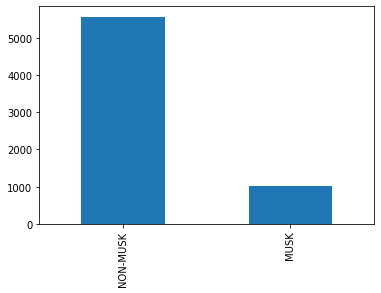

In [15]:
df_raw['mol_Type'].value_counts().plot.bar()

Now lets extract some more information from feature ['molecule_name'] , below code will extract integral values
from the feature and convert in into (int).This will be done by import a library re and using lambda funtion
Afer that features which are not required will be droped using drop function.

In [16]:
import re
df_raw['molecule_name'] = df_raw['molecule_name'].apply(lambda x: re.search(r'\d+', x).group()).astype(int)

df_raw.drop(['ID','mol_Type'],axis=1,inplace=True)

In [17]:
df_raw['molecule_name'].value_counts()

146    1427
252    1010
147     911
288     344
192     286
       ... 
309       2
305       2
358       2
97        1
96        1
Name: molecule_name, Length: 101, dtype: int64

Lets check for any missing values in the new feature which is newly created

In [18]:
df_raw['molecule_name'].isnull().sum()

0

Lets observe the feature ['conformation_name']

In [19]:
df_raw['conformation_name'].value_counts()

j146_1+168    1
j146_2+20     1
j147_4+125    1
j147_3+156    1
252_2+147     1
             ..
208_1+14      1
j146_3+210    1
j147_3+228    1
f146_1+20     1
287_2+22      1
Name: conformation_name, Length: 6598, dtype: int64

Now,this is an important feature combining different information containing molecular name , stereoisomer number and
conformation type of the compound,Below code will extract these information and convert them to new features

In [20]:
df_raw['conformation_name'] = df_raw['conformation_name'].map(lambda x:x.split('_')[1])

df_raw['stereoisomer_num']=df_raw['conformation_name'].map(lambda x:x.split('+')[0]).astype(int)

df_raw['conformation_name'] = df_raw['conformation_name'].map(lambda x:x.split('+')[1]).astype(int)

In [21]:
df_raw.head()

,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,...,f159,f160,f161,f162,f163,f164,f165,f166,class,stereoisomer_num
0,211,1,46,-108,-60,-69,-117,49,38,-161,...,52,-7,39,126,156,-50,-112,96,1,1
1,211,10,41,-188,-145,22,-117,-6,57,-171,...,-2,52,103,136,169,-61,-136,79,1,1
2,211,11,46,-194,-145,28,-117,73,57,-168,...,-154,57,143,142,165,-67,-145,39,1,1
3,211,12,41,-188,-145,22,-117,-7,57,-170,...,-4,52,104,136,168,-60,-135,80,1,1
4,211,13,41,-188,-145,22,-117,-7,57,-170,...,-4,52,104,137,168,-60,-135,80,1,1


Now we have created a new feature ['stereoisomer_num'] showing stereoisomer number of the compound.
Lets observe this feature now by using value_counts function

In [22]:
df_raw['stereoisomer_num'].value_counts()

1    3326
2    1442
4     927
3     903
Name: stereoisomer_num, dtype: int64

Lets plot the feature to visualise it

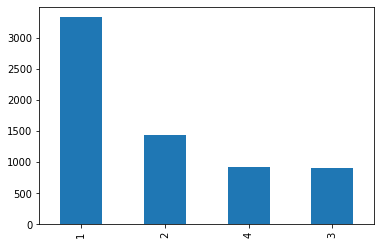

In [23]:
df_raw['stereoisomer_num'].value_counts().plot.bar()

Now,it has been observed that the Stereoisomer with category 1 are more in numbers than other categories,
Lets make a stacked barplot with the ['class'] feature by using crosstab function in pandas library.

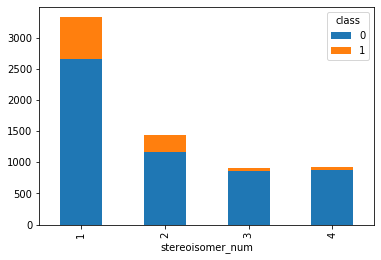

In [24]:
pd.crosstab(df_raw['stereoisomer_num'],df_raw['class']).plot(kind='bar',stacked=True)

Now,It has been observed that Stereoisomer with category 1 have more Non-Musk molecules as compared to other Categories

Below code will assigned independed and dependent variables as X and y 

In [25]:
X=df_raw.drop(['class'],axis=1)
y=df_raw['class']

Now lets check for some outlier.
Below code will show boxpot of the feature having unique values.

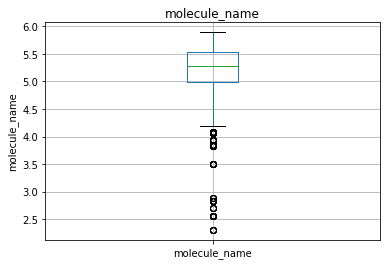

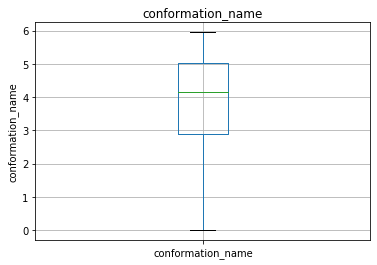

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


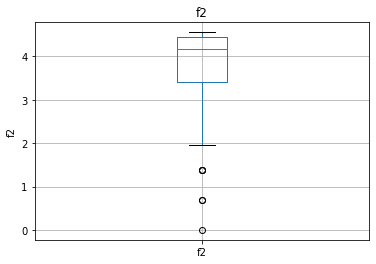

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


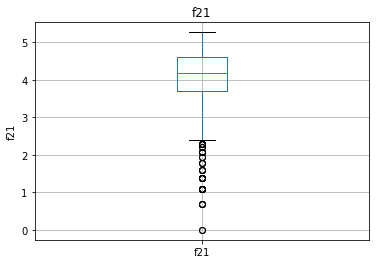

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


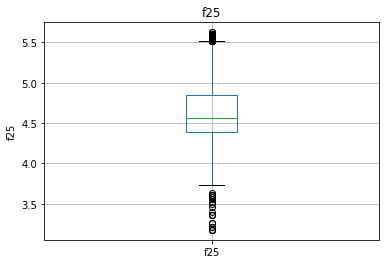

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


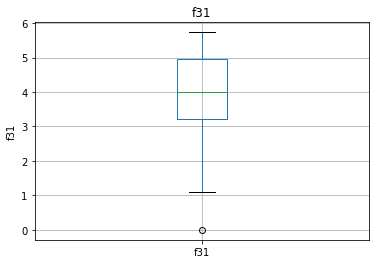

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


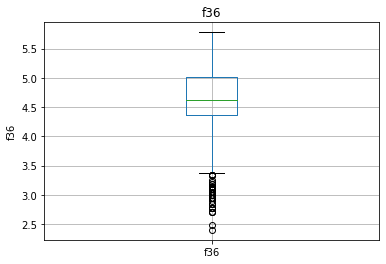

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


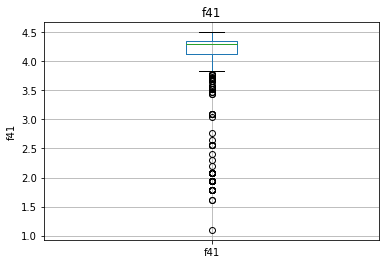

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


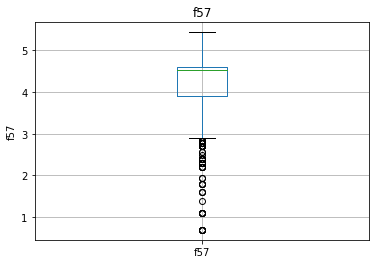

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


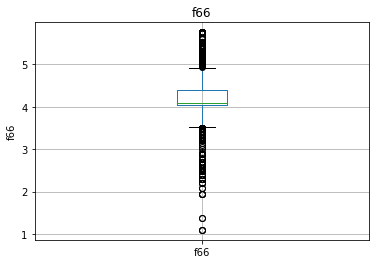

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


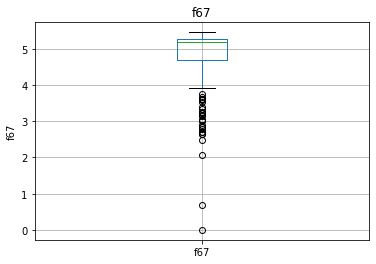

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


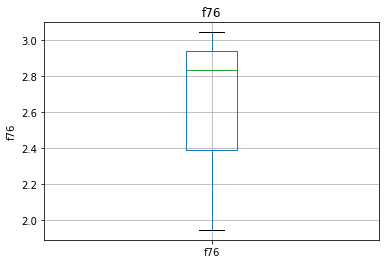

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


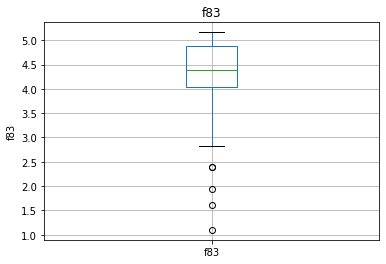

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


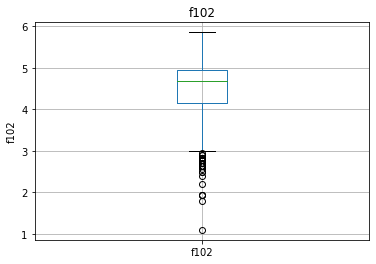

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


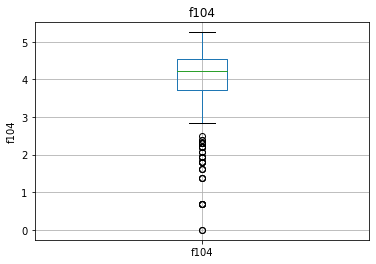

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


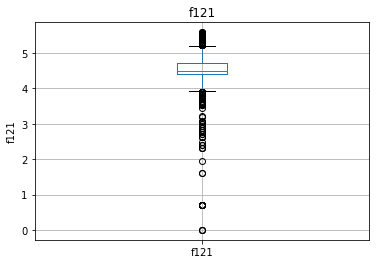

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


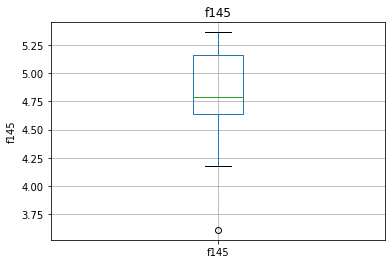

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


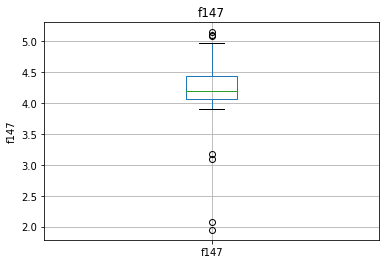

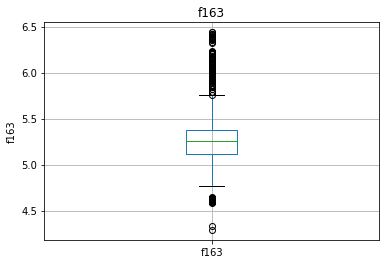

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


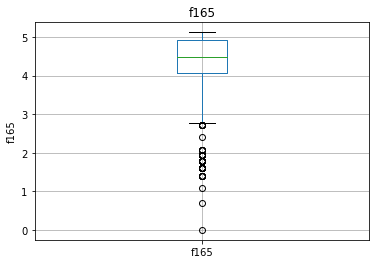

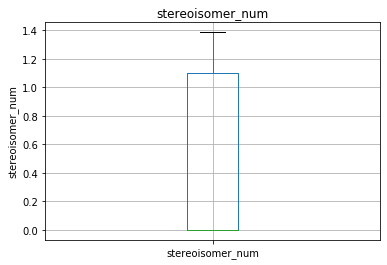

In [26]:
for feature in df_raw.columns:
    df_raw=df_raw.copy()
    if 0 in df_raw[feature].unique():
        pass
    else:
        df_raw[feature]=np.log(df_raw[feature])
        df_raw.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

Lets take out these columns to new dataframe and remove the outliers.
these outliers are removed by IQR method in which values beyond 3 quartile range are removed

In [27]:
outliers_columns=df_raw[['molecule_name','f2','f21','f25','f31','f36','f41','f57','f66','f67','f102','f104',
                       'f121','f163','f165']]

In [28]:
Q1 = outliers_columns.quantile(0.25)
Q3 = outliers_columns.quantile(0.75)
IQR = Q3 - Q1

df_outliers = outliers_columns[~((outliers_columns < (Q1 - 1.5 * IQR)) |(outliers_columns > (Q3 + 1.5 * IQR))).any(axis=1)]
df_outliers.shape , df_raw.shape

((4339, 15), (6598, 170))

Removing these values shows a bigger impact to Data.
You can see the shape of data has been reduced from 6598 to 4339.
Lets drop these columns and see how model workds

In [29]:
X2=X.drop(['molecule_name','f2','f21','f25','f31','f36','f41','f57','f66','f67','f102','f104',
                       'f121','f163','f165'],axis=1)

Now splitting data using train test split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2,y, test_size = 0.2, random_state = 0)

Now we will scale the data using Robust Scaler
This Scaler removes the median and scales the data according to the quantile range 

In [31]:
from sklearn.preprocessing import RobustScaler
Scale=RobustScaler()
X_train_scale = RobustScaler().fit_transform(X_train)
X_test_scale=RobustScaler().fit_transform(X_test)

Lets start by building a Logistic Regression model
Logistic regression works well when we have target variable in form of binary classification i.e 0 and 1
Import different libraries for metrics

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

In [33]:
logit = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                          verbose=1, warm_start=False)

In [34]:
logit.fit(X_train_scale, y_train) 
predictions = logit.predict(X_test_scale)

[LibLinear]

In [35]:
print("Accuracy Score : ",accuracy_score(y_test,predictions))
print("Precision Score : ",precision_score(y_test,predictions))
print("Recall Score : ",recall_score(y_test,predictions))
print("F1 Score : ",f1_score(y_test,predictions))
print("Area Under Curve : ",roc_auc_score(y_test,predictions))

Accuracy Score :  0.953030303030303
Precision Score :  0.9156626506024096
Recall Score :  0.76
F1 Score :  0.8306010928961748
Area Under Curve :  0.87375


In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1120
           1       0.92      0.76      0.83       200

    accuracy                           0.95      1320
   macro avg       0.94      0.87      0.90      1320
weighted avg       0.95      0.95      0.95      1320



Now,Following points are observed from classification Report:
1.) Model is giving an accuracy of 95% which is not bad,but as dicussed earlier,target variable is unbalanced and
    the model may be biased.So we will check Recall Score.
2.) We are able to predict 99% '0' and 76% of '1' correctly

Lets Create another model using KNeighborsClassifier because of two main reasons:
1.)It is robust to noisy training data and is effective if training data is large
2.)There's no need to build a model, tune several parameters, or make additional assumptions.

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None,
                          n_jobs=-1, n_neighbors=5, p=2, weights='uniform')


knn.fit(X_train_scale, y_train) 
knn.predict(X_test_scale)

print(classification_report(y_test,knn.predict(X_test_scale)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1120
           1       0.89      0.82      0.86       200

    accuracy                           0.96      1320
   macro avg       0.93      0.90      0.92      1320
weighted avg       0.96      0.96      0.96      1320



As we can see from Recall score
We are able to predict 98% '0' and 82% of '1' correctly which is improved
Lets try some more Algorithms.

Random Forest uses fully grown decision trees (low bias, high variance). 
It tackles the error reduction task in the opposite way: by reducing variance. 
The trees are made uncorrelated to maximize the decrease in variance, but the algorithm cannot reduce bias
(which is slightly higher than the bias of an individual tree in the forest).
Hence the need for large, unpruned trees, so that the bias is initially as low as possible.

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100, random_state = 42)
rfc.fit(X_train_scale, y_train)
rfc.predict(X_test)


print(classification_report(y_test,rfc.predict(X_test_scale)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1120
           1       0.98      0.79      0.87       200

    accuracy                           0.96      1320
   macro avg       0.97      0.89      0.92      1320
weighted avg       0.96      0.96      0.96      1320



Since Recall score is not improved,Lets see other metrics

In [40]:
print("Accuracy Score : ",accuracy_score(y_test,rfc.predict(X_test_scale)))
print("Precision Score : ",precision_score(y_test,rfc.predict(X_test_scale)))
print("Recall Score : ",recall_score(y_test,rfc.predict(X_test_scale)))
print("F1 Score : ",f1_score(y_test,rfc.predict(X_test_scale)))
print("Area Under Curve : ",roc_auc_score(y_test,rfc.predict(X_test_scale)))

Accuracy Score :  0.9643939393939394
Precision Score :  0.9751552795031055
Recall Score :  0.785
F1 Score :  0.8698060941828254
Area Under Curve :  0.8907142857142858


As Random Forest can handle outliers,Lets check Recall score with all columns wihtout scaling Data

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100, random_state = 42)
rfc.fit(X_train, y_train)
rfc.predict(X_test)


print(classification_report(y_test,rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1120
           1       0.97      0.87      0.92       200

    accuracy                           0.98      1320
   macro avg       0.97      0.93      0.95      1320
weighted avg       0.98      0.98      0.98      1320



Since in predicting '1' Recall score is imporoved to 87% and in predicting 0 we have 100% Recall score
Lets see Boosting techinique and see how our metrics changes.

Boosting is based on weak learners (high bias, low variance).Boosting reduces error mainly by reducing bias.

Lets start by importing Extreme Gradient Boosting on complete Dataset

In [42]:
import xgboost as xgb
xgb=xgb.XGBClassifier()

eval_set = [(X_train, y_train), (X_test, y_test)]

xgb.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)


y_pred = xgb.predict(X_test)


print(classification_report(y_test,xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1120
           1       0.98      0.94      0.96       200

    accuracy                           0.99      1320
   macro avg       0.99      0.97      0.98      1320
weighted avg       0.99      0.99      0.99      1320



In [43]:
print("Accuracy Score : ",accuracy_score(y_test,xgb.predict(X_test)))
print("Precision Score : ",precision_score(y_test,xgb.predict(X_test)))
print("Recall Score : ",recall_score(y_test,xgb.predict(X_test)))
print("F1 Score : ",f1_score(y_test,xgb.predict(X_test)))
print("Area Under Curve : ",roc_auc_score(y_test,xgb.predict(X_test)))

Accuracy Score :  0.9886363636363636
Precision Score :  0.9842931937172775
Recall Score :  0.94
F1 Score :  0.9616368286445013
Area Under Curve :  0.9686607142857143


We can see that we are getting 94% of Recall Score which is best so far
So we finally create our model with Extreme Gradient Boosting.
Lets Plot the Log loss graph and Classification Error Graph for both Training and Test Data

In [44]:
predictions = [round(value) for value in y_pred]

Recall = recall_score(y_test, predictions)

results = xgb.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

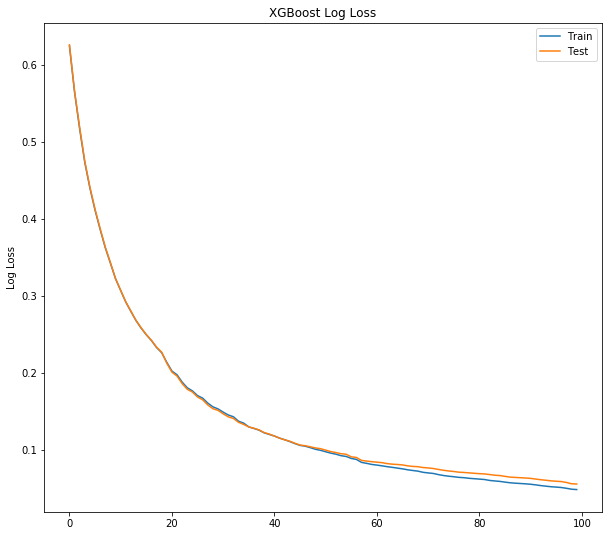

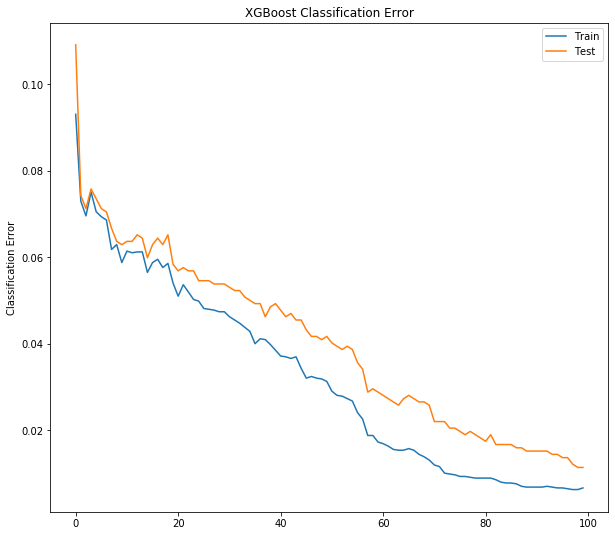

In [45]:
predictions = [round(value) for value in y_pred]

results = xgb.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)



fig, ax = plt.subplots(figsize=(10,9))
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

fig, ax = plt.subplots(figsize=(10,9))
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

# feature_importances_

Lets create a function which will return a new datafame showing features and its importances

In [46]:
def feat_importance(m, df):
    return pd.DataFrame({'Columns':df.columns, 'Features':xgb.feature_importances_}
                       ).sort_values('Features', ascending=False)

As there are more features in our Data,we will display top 30 Features 

In [53]:
Fi=feat_importance(xgb,X_train)
Fi=Fi[:30]
Fi

,Columns,Features
37,f36,0.068577
34,f33,0.059294
125,f124,0.047292
10,f9,0.046305
165,f164,0.035625
15,f14,0.035060
111,f110,0.034776
1,conformation_name,0.029752
27,f26,0.028479
149,f148,0.026186


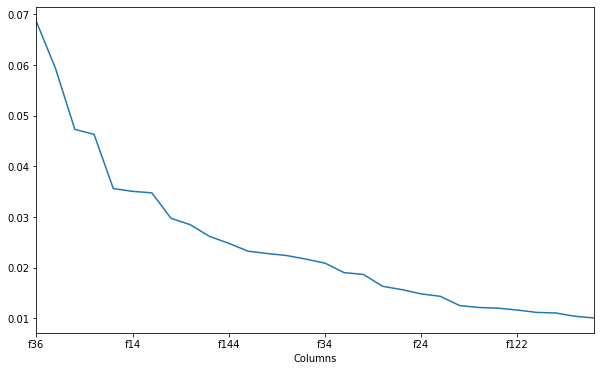

In [54]:
Fi.plot('Columns', 'Features', figsize=(10,6), legend=False)

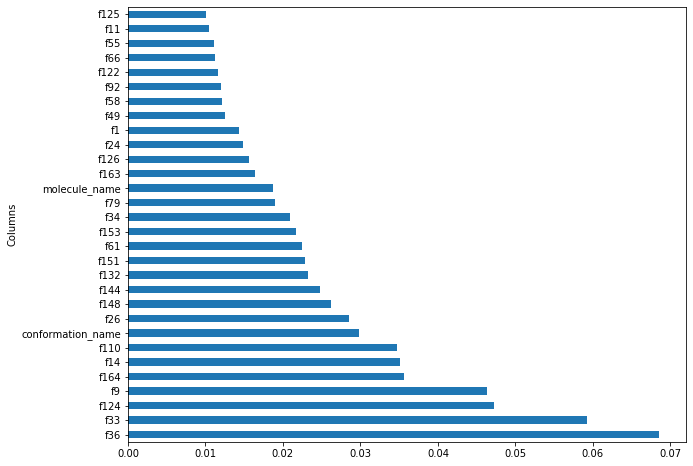

In [55]:
def plot_fi(fi): return fi.plot('Columns', 'Features','barh', figsize=(10,8), legend=False)
plot_fi(Fi);